In [28]:
import pandas as pd
from torch import exp
import numpy as np
import itertools
import matplotlib.pyplot as plt
# Importing and converting the data
training_data = pd.read_csv('./data3.csv')
training_data_x = training_data['day'].to_numpy()
training_data_y = training_data['head'].to_numpy()
training_data_x_unsorted = training_data_x.copy()
training_data_y_unsorted = training_data_y.copy()

training_data_x.sort()
training_data_y.sort()

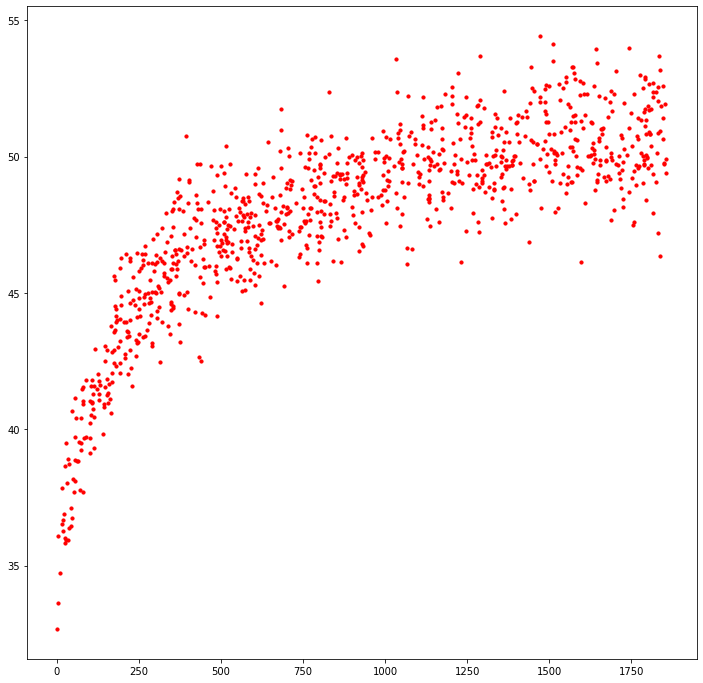

In [29]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(12, 12))
plt.scatter(training_data_x_unsorted,training_data_y_unsorted , c='red', s=10, label='Original data')
plt.show()

In [30]:

import torch
torch.set_default_dtype(torch.float64)
# Training the model
x_train = torch.reshape(torch.tensor(training_data_x), (-1, 1))
y_train = torch.reshape(torch.tensor(training_data_y), (-1, 1))

w1 = torch.rand(1, 1, requires_grad=True)
b1 = torch.rand(1, requires_grad=True)
lr = 0.001
epochs = 6000
stepping = 1000



In [31]:
def sigmoid(z):
    sig = 1.0/(1.0 + exp(-z))
    return sig

def prediction(z):
    return 20 * z + 31
# Training the model with with manual optimizer

sig = torch.nn.Sigmoid()
optimizer = torch.optim.SGD([w1, b1], lr=0.0001)
criterion = torch.nn.BCELoss()

for i in range(1, epochs):
    linear_model = x_train.mm(w1).add(b1)
    y_pred = sigmoid(linear_model)

    loss = criterion(y_pred, sigmoid(y_train))
    #loss = (((prediction(y_pred) - prediction(y_train)).pow(2).sum())/training_data_y.size)
    if i % stepping == 0:
        print ("iteration: ", i, "loss: ", loss.item())

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

print("trained w1: ",w1)
print("trained b1: ",b1)

iteration:  1000 loss:  0.00021014407786172827
iteration:  2000 loss:  0.0002101152135869507
iteration:  3000 loss:  0.00021008635803389242
iteration:  4000 loss:  0.0002100575111984194
iteration:  5000 loss:  0.00021002867307639617
trained w1:  tensor([[0.8483]], requires_grad=True)
trained b1:  tensor([0.0294], requires_grad=True)


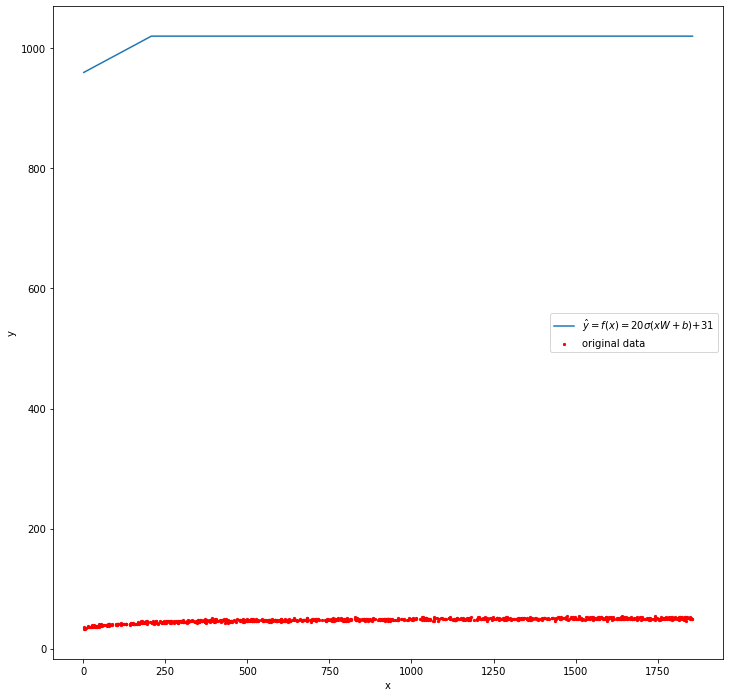

In [33]:
x = torch.linspace(torch.min(x_train), torch.max(x_train), 10).reshape(-1, 1)
predicted_tensor = prediction(sigmoid(x @ w1 + b1)).detach().numpy()
plt.figure(figsize=(12, 12))

#plt.plot(x_train, y_train, 'o', label='$(x^{(i)}, y^{(i)})$')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(training_data_x_unsorted, training_data_y_unsorted, c='red', s=5, label='original data')

plt.plot(x, (20 * predicted_tensor), label='$\\hat y = f(x) = 20\\sigma(xW+b$)+31')
plt.legend()
plt.show()